In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
# # Items in each result are train_subset, test, test_subset fi score; train_subset_rank, test_subset_rank, test fi rank
# with open('/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression/diabetes_regr/varying_sample_row_n/seed1/keep_all_rows/rep0/RF_Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus_feature_importance.pkl', 'rb') as f:
#     local_mdi_plus = pickle.load(f)
# with open('/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression/diabetes_regr/varying_sample_row_n/seed1/keep_all_rows/rep0/RF_TreeSHAP_RF_feature_importance.pkl', 'rb') as f:
#     treeshap = pickle.load(f)
# with open('/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_regression/diabetes_regr/varying_sample_row_n/seed1/keep_all_rows/rep0/RF_LIME_RF_plus_feature_importance.pkl', 'rb') as f:
#     lime = pickle.load(f)

# def feature_ablation_heatmap(rank_matrix):
#     n_features = rank_matrix.shape[1]
#     result = np.zeros((n_features, n_features), dtype=int)
#     for ranking in rank_matrix:
#         for rank, feature in enumerate(ranking):
#             result[rank, feature] += 1
#     return result
# train_result = feature_ablation_heatmap(local_mdi_plus[1][3])
# test_result = feature_ablation_heatmap(local_mdi_plus[1][4])

In [3]:
# fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# sns.heatmap(train_result, annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=axes[0], vmin=0, vmax=85)
# axes[0].set_title("Feature Ablation Heatmap Training")
# axes[0].set_xlabel("Features")
# axes[0].set_ylabel("Feature Ablation Rounds")

# sns.heatmap(test_result, annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=axes[1], vmin=0, vmax=85)
# axes[1].set_title("Feature Ablation Heatmap Testing")
# axes[1].set_xlabel("Features")
# axes[1].set_ylabel("Feature Ablation Rounds")

# plt.tight_layout()
# plt.savefig("feature_ablation_heatmap_diabetes_regression_local_mdi_plus.png")
# plt.show()

In [4]:
task_name = 'CCLE_2000' #'diabetes_regr'
task = "regression" #"classification" #"regression"
ablation_directory = f'./results/mdi_local.real_data_{task}/{task_name}/varying_sample_row_n'
folder_names = [folder for folder in os.listdir(ablation_directory) if os.path.isdir(os.path.join(ablation_directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
experiments_seeds = [7,8,9,10]#add
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(ablation_directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# rf_plus_directory = f'/scratch/users/zhongyuan_liang/saved_models/{task_name}'
# combined_df_rf_plus = pd.DataFrame()
# for file in os.listdir(rf_plus_directory):
#     if file.endswith(".csv"):
#         df = pd.read_csv(os.path.join(rf_plus_directory, file))
#         combined_df_rf_plus = pd.concat([combined_df_rf_plus, df], ignore_index=True)

In [5]:
# combined_df_rf_plus.head()

In [6]:
# combined_df.head(6)

### Summarise the fitted RF_Plus Performance and Time

In [7]:
# grouped = combined_df_rf_plus.groupby("Model")
# if task == "classification":
#     for model, group_df in grouped:
#         print("Model:", model)
#         print("AUROC:", group_df["AUC"].mean())
#         print("AUPRC:", group_df["AUPRC"].mean())
#         print("F1:", group_df["F1"].mean())
#         print("Time", group_df["Time"].mean())
# elif task == "regression":
#     for model, group_df in grouped:
#         print("Model:", model)
#         print("MSE:", group_df["MSE"].mean())
#         print("R2:", group_df["R2"].mean())
#         print("Time", group_df["Time"].mean())

### Summarise the Ablation Data

In [8]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 316 and the test size is 156


In [9]:
combined_df.groupby('fi')['fi_time'].mean().reset_index()
combined_df.groupby('fi')['train_subset_ablation_addition_time'].mean().reset_index()

,fi,train_subset_ablation_addition_time
0,Kernel_SHAP_RF_plus,197.174139
1,LIME_RF_plus,192.441256
2,Local_MDI+_fit_on_OOB_RFPlus,188.506727
3,Local_MDI+_fit_on_all_evaluate_on_all_RFPlus,189.743057
4,Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus,193.131046
5,Local_MDI+_fit_on_inbag_RFPlus,204.623034
6,Local_MDI+_global_MDI_plus_RFPlus,182.370469
7,Oracle_test_RFPlus,0.000123
8,Random,192.047506
9,TreeSHAP_RF,187.634445


### Plot the Ablation Data Performance

In [10]:
methods_train_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'Random', 'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test_subset = ['Kernel_SHAP_RF_plus','Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                        'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus', 'LIME_RF_plus',
                        'Oracle_test_RFPlus', 'Random', 'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
methods_test = ['Local_MDI+_fit_on_OOB_RFPlus', 'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus',
                'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus','Local_MDI+_fit_on_inbag_RFPlus',
                'Oracle_test_RFPlus', 'Random', 'TreeSHAP_RF', 'Local_MDI+_global_MDI_plus_RFPlus']
num_features = combined_df['num_ablate_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}
ablation_models = {"regression": ["RF_Regressor", "Linear", "XGB_Regressor", "RF_Plus_Regressor"], 
                   "classification": ["RF_Classifier","LogisticCV", "SVM", "XGBoost_Classifier", "RF_Plus_Classifier"]}

In [11]:
color_map = {
    'Kernel_SHAP_RF_plus': '#1f77b4',  # blue
    'Local_MDI+_fit_on_OOB_RFPlus': '#ff7f0e',  # orange
    'Local_MDI+_fit_on_all_evaluate_on_all_RFPlus': '#2ca02c',  # green
    'Local_MDI+_fit_on_all_evaluate_on_oob_RFPlus': '#d62728',  # red
    'Local_MDI+_fit_on_inbag_RFPlus': '#9467bd',  # purple
    'LIME_RF_plus': '#8c564b',  # brown
    'Oracle_test_RFPlus': '#e377c2',  # pink
    'Random': '#7f7f7f',  # gray
    'TreeSHAP_RF': '#bcbd22',  # yellow
    'Local_MDI+_global_MDI_plus_RFPlus': '#17becf'  # cyan
}

#### Training Subset Data

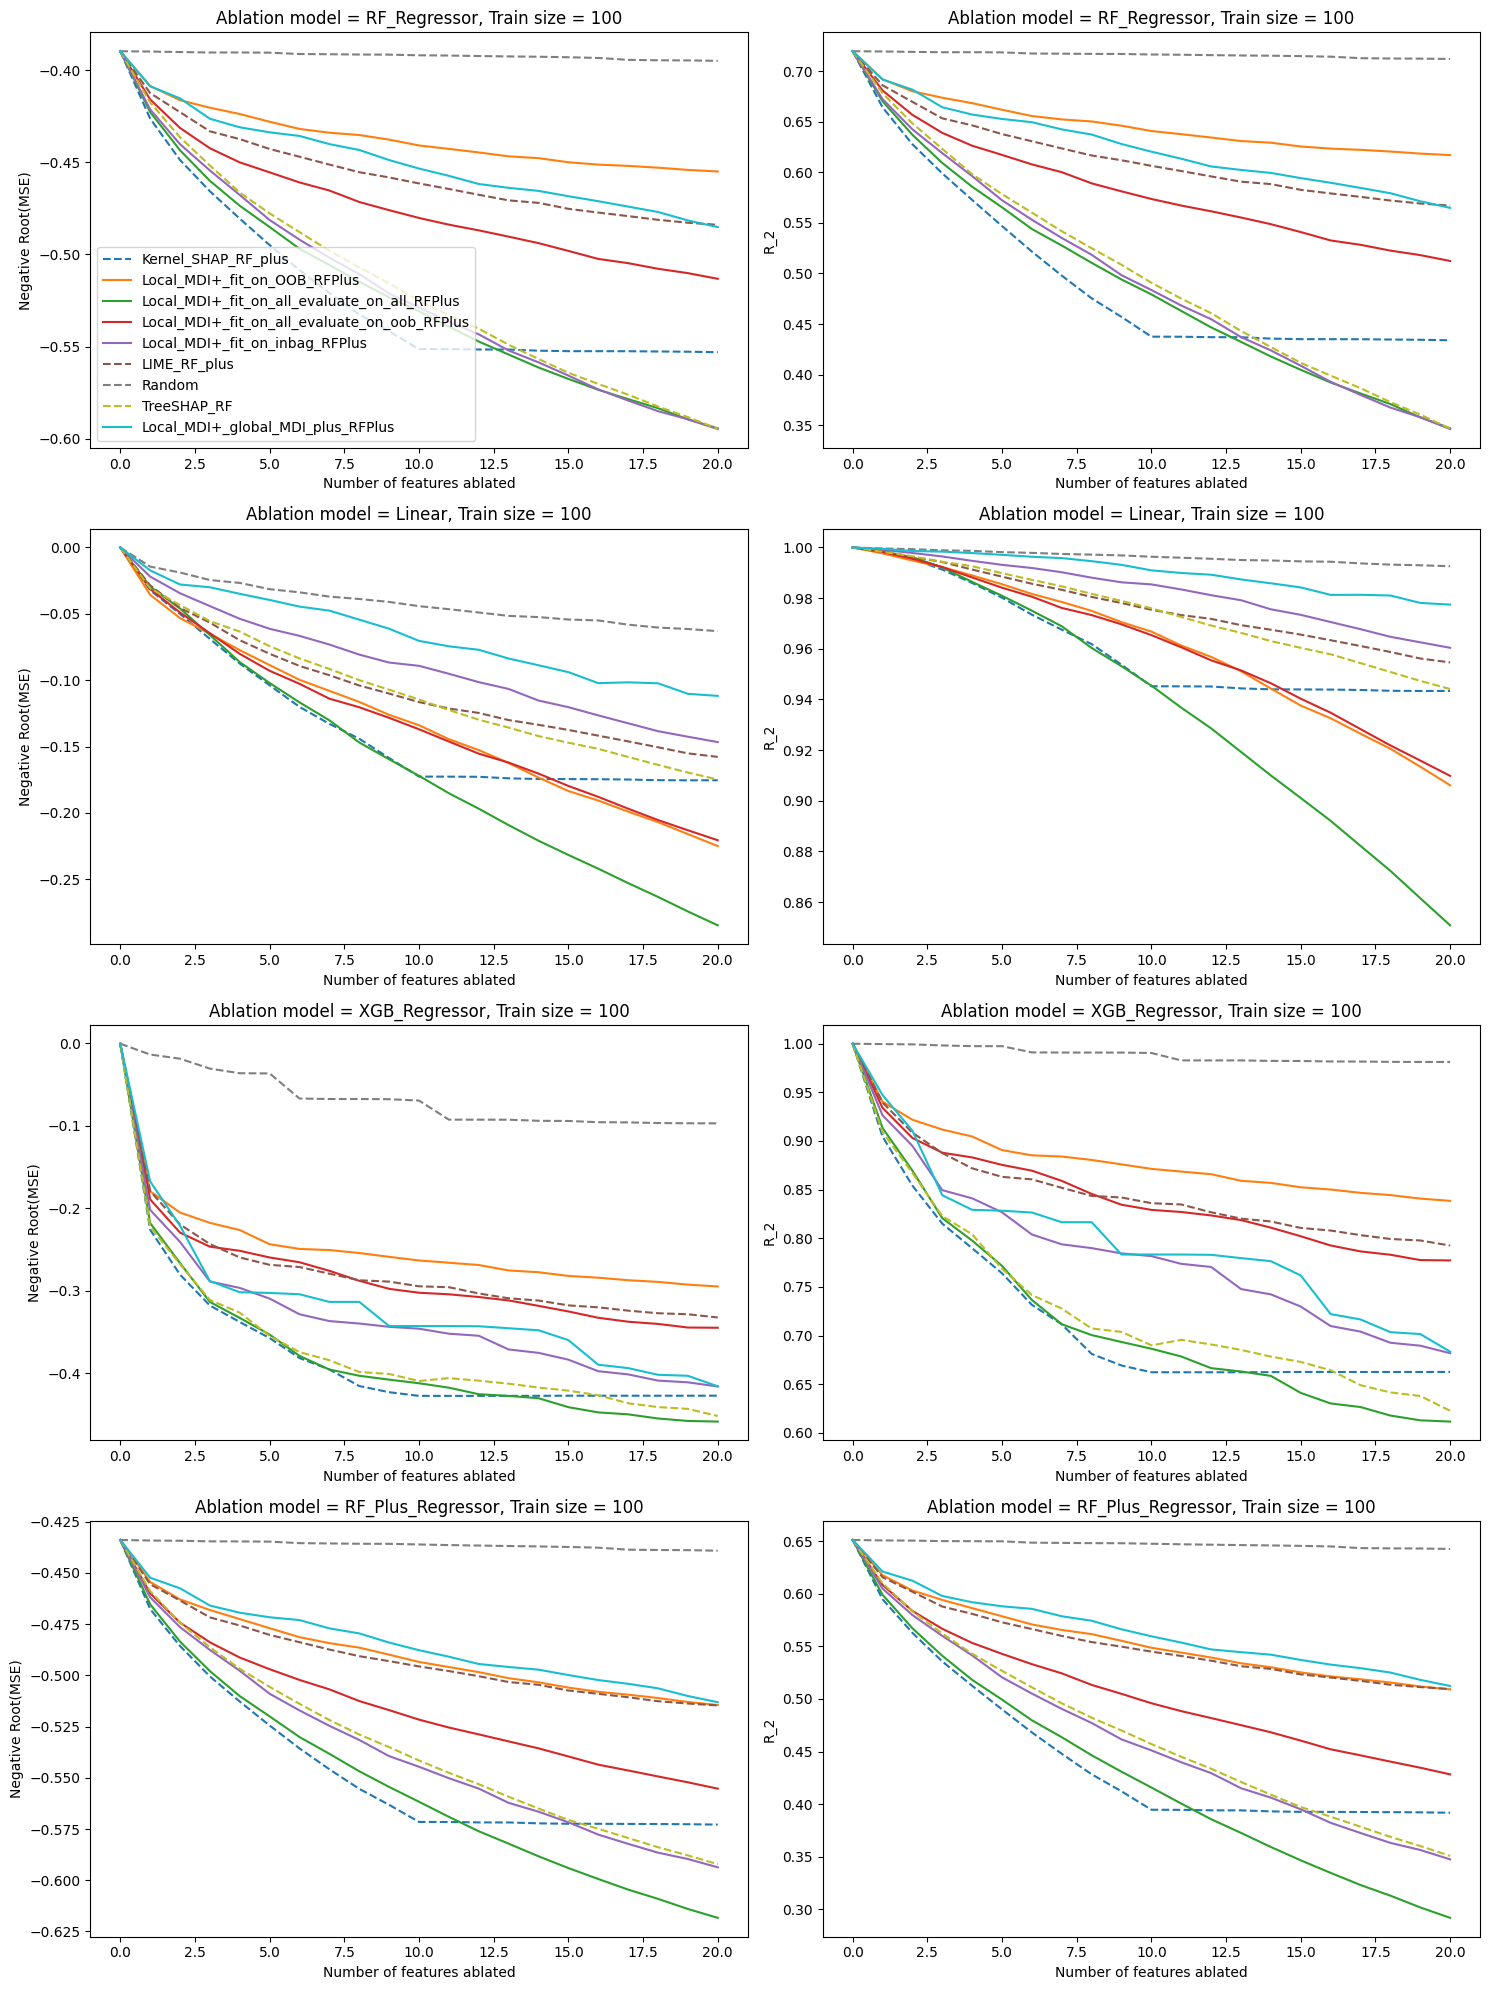

In [12]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_removal.png")
plt.show()

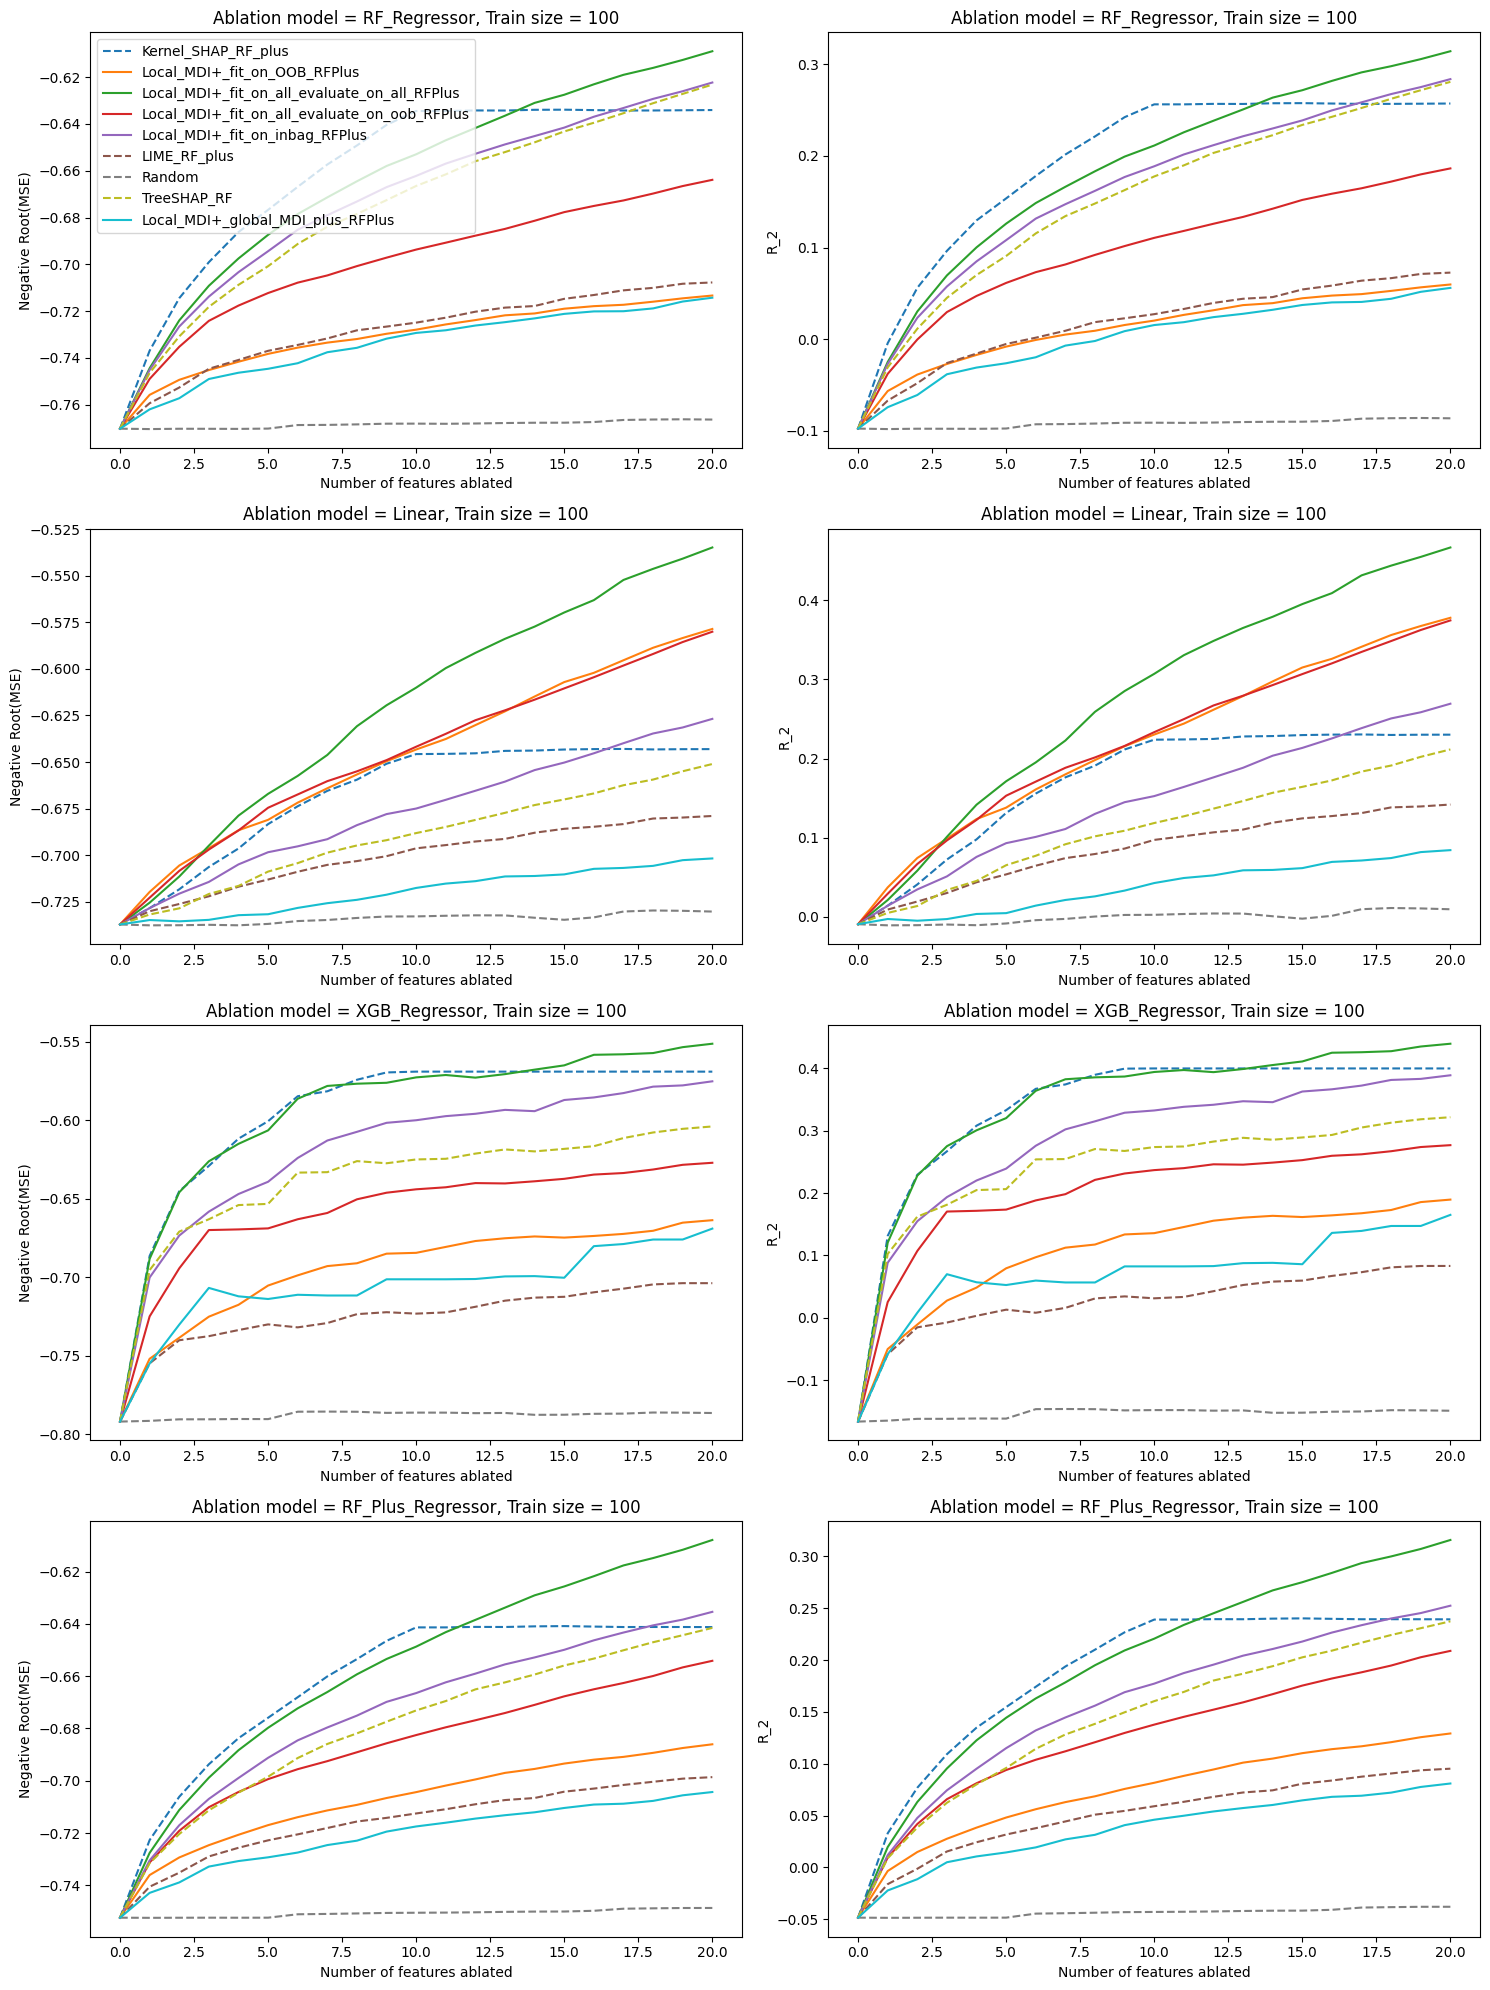

In [13]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_train_subset:
            results[m] = []
        for m in methods_train_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_before_ablation_addition"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_train_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
        ax = axs[i, j]
        for m in methods_train_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Train size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Train size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_train_addition.png")
plt.show()

#### Test Subset Data

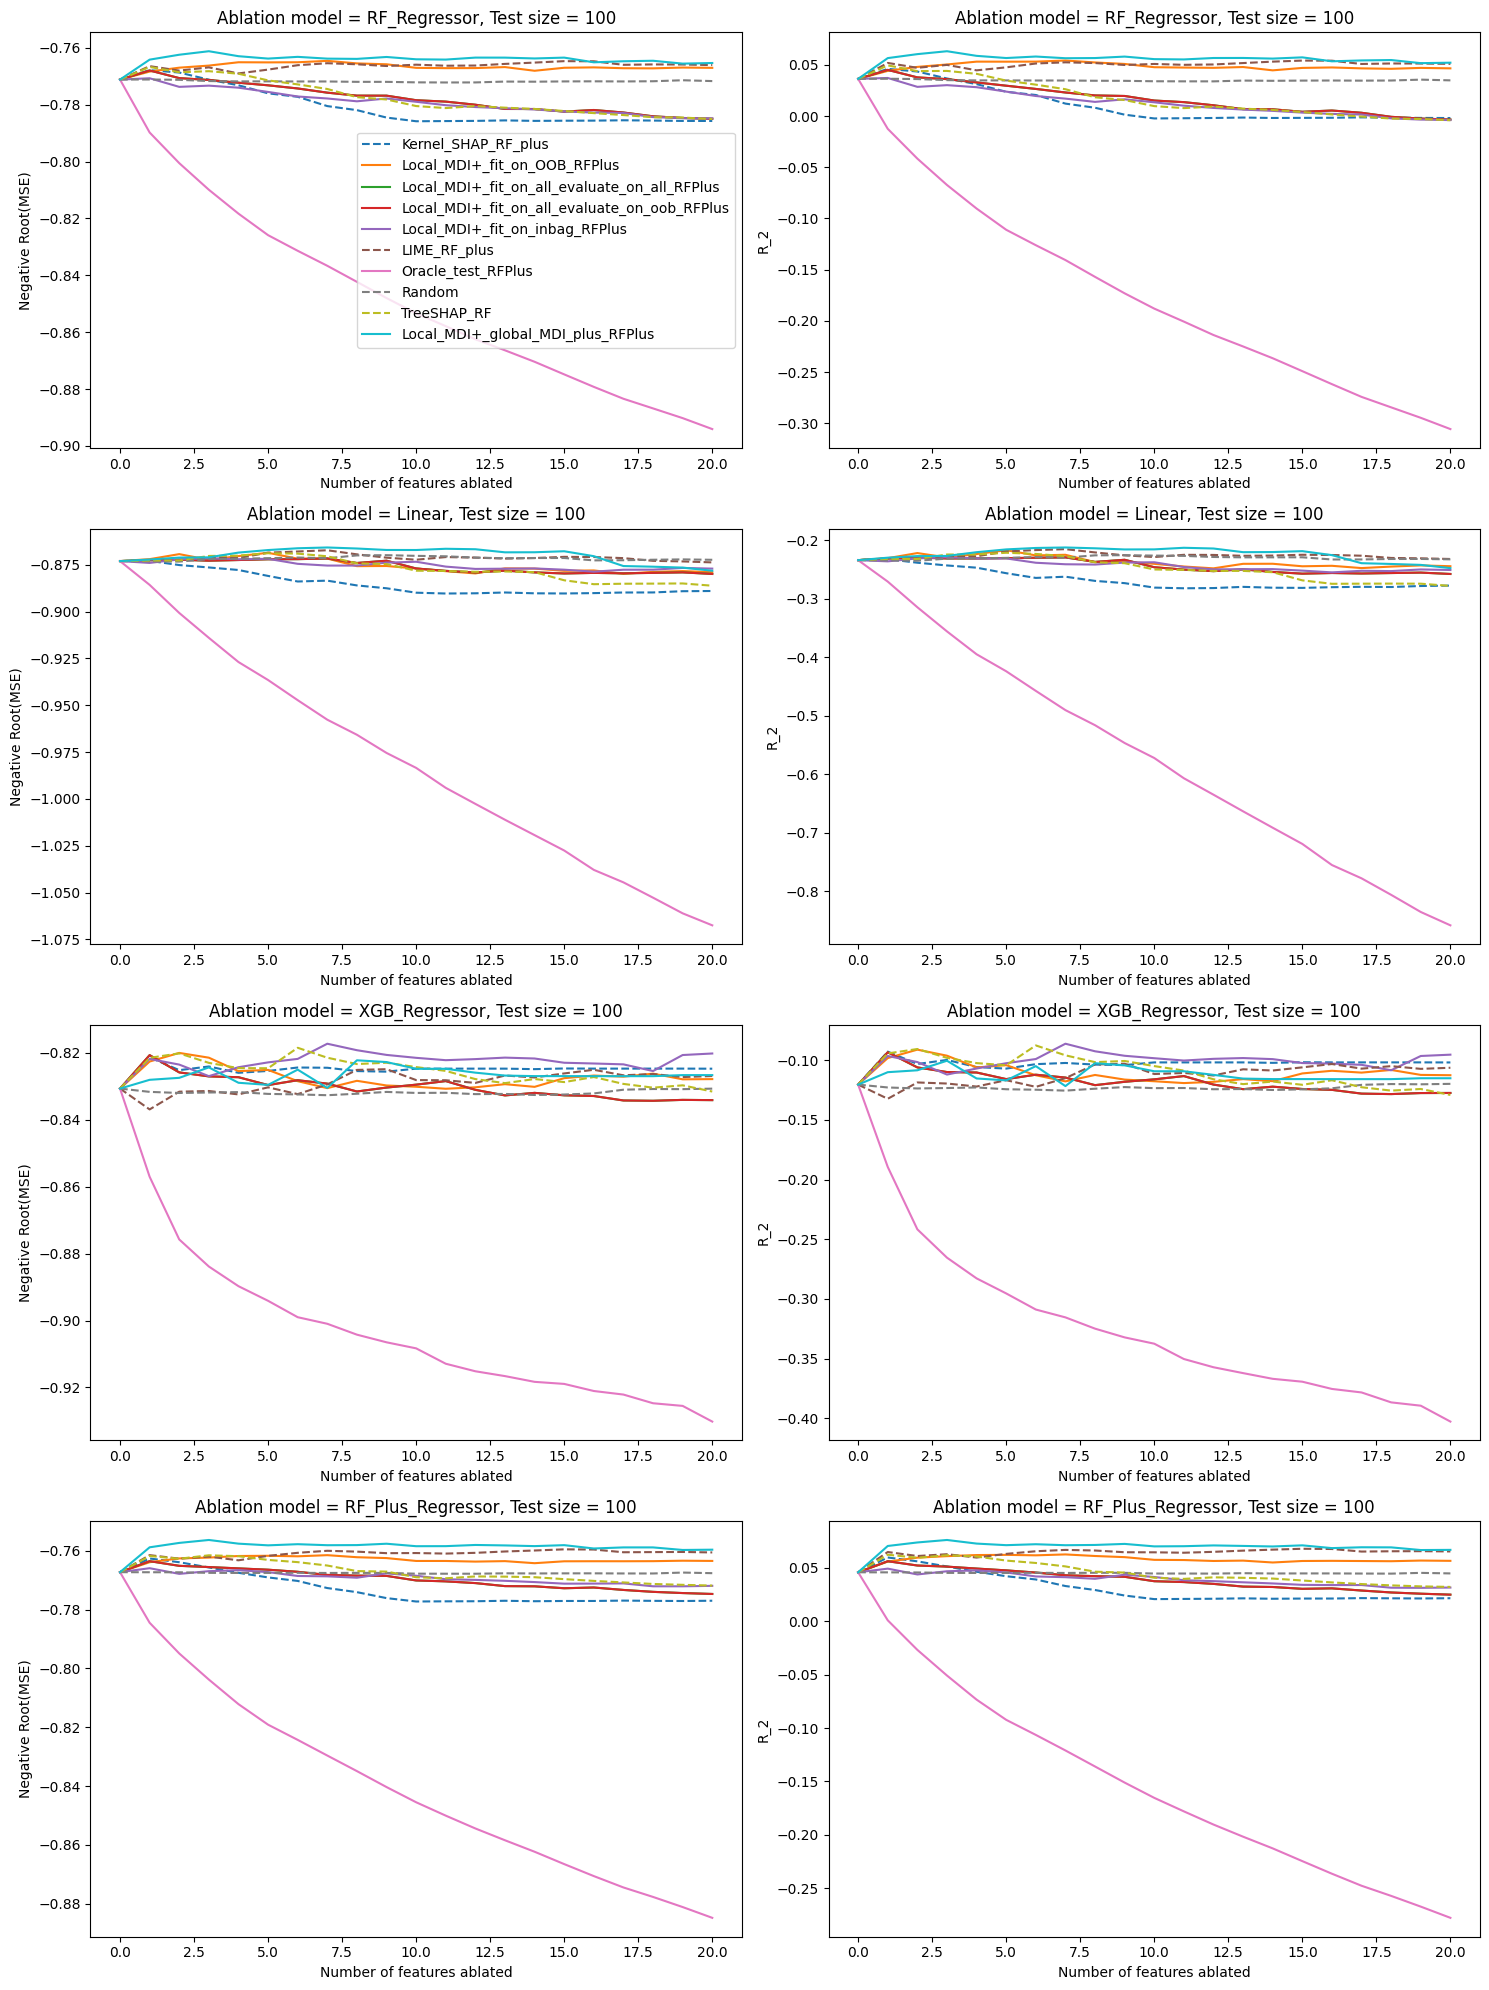

In [14]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_removal.png")
plt.show()

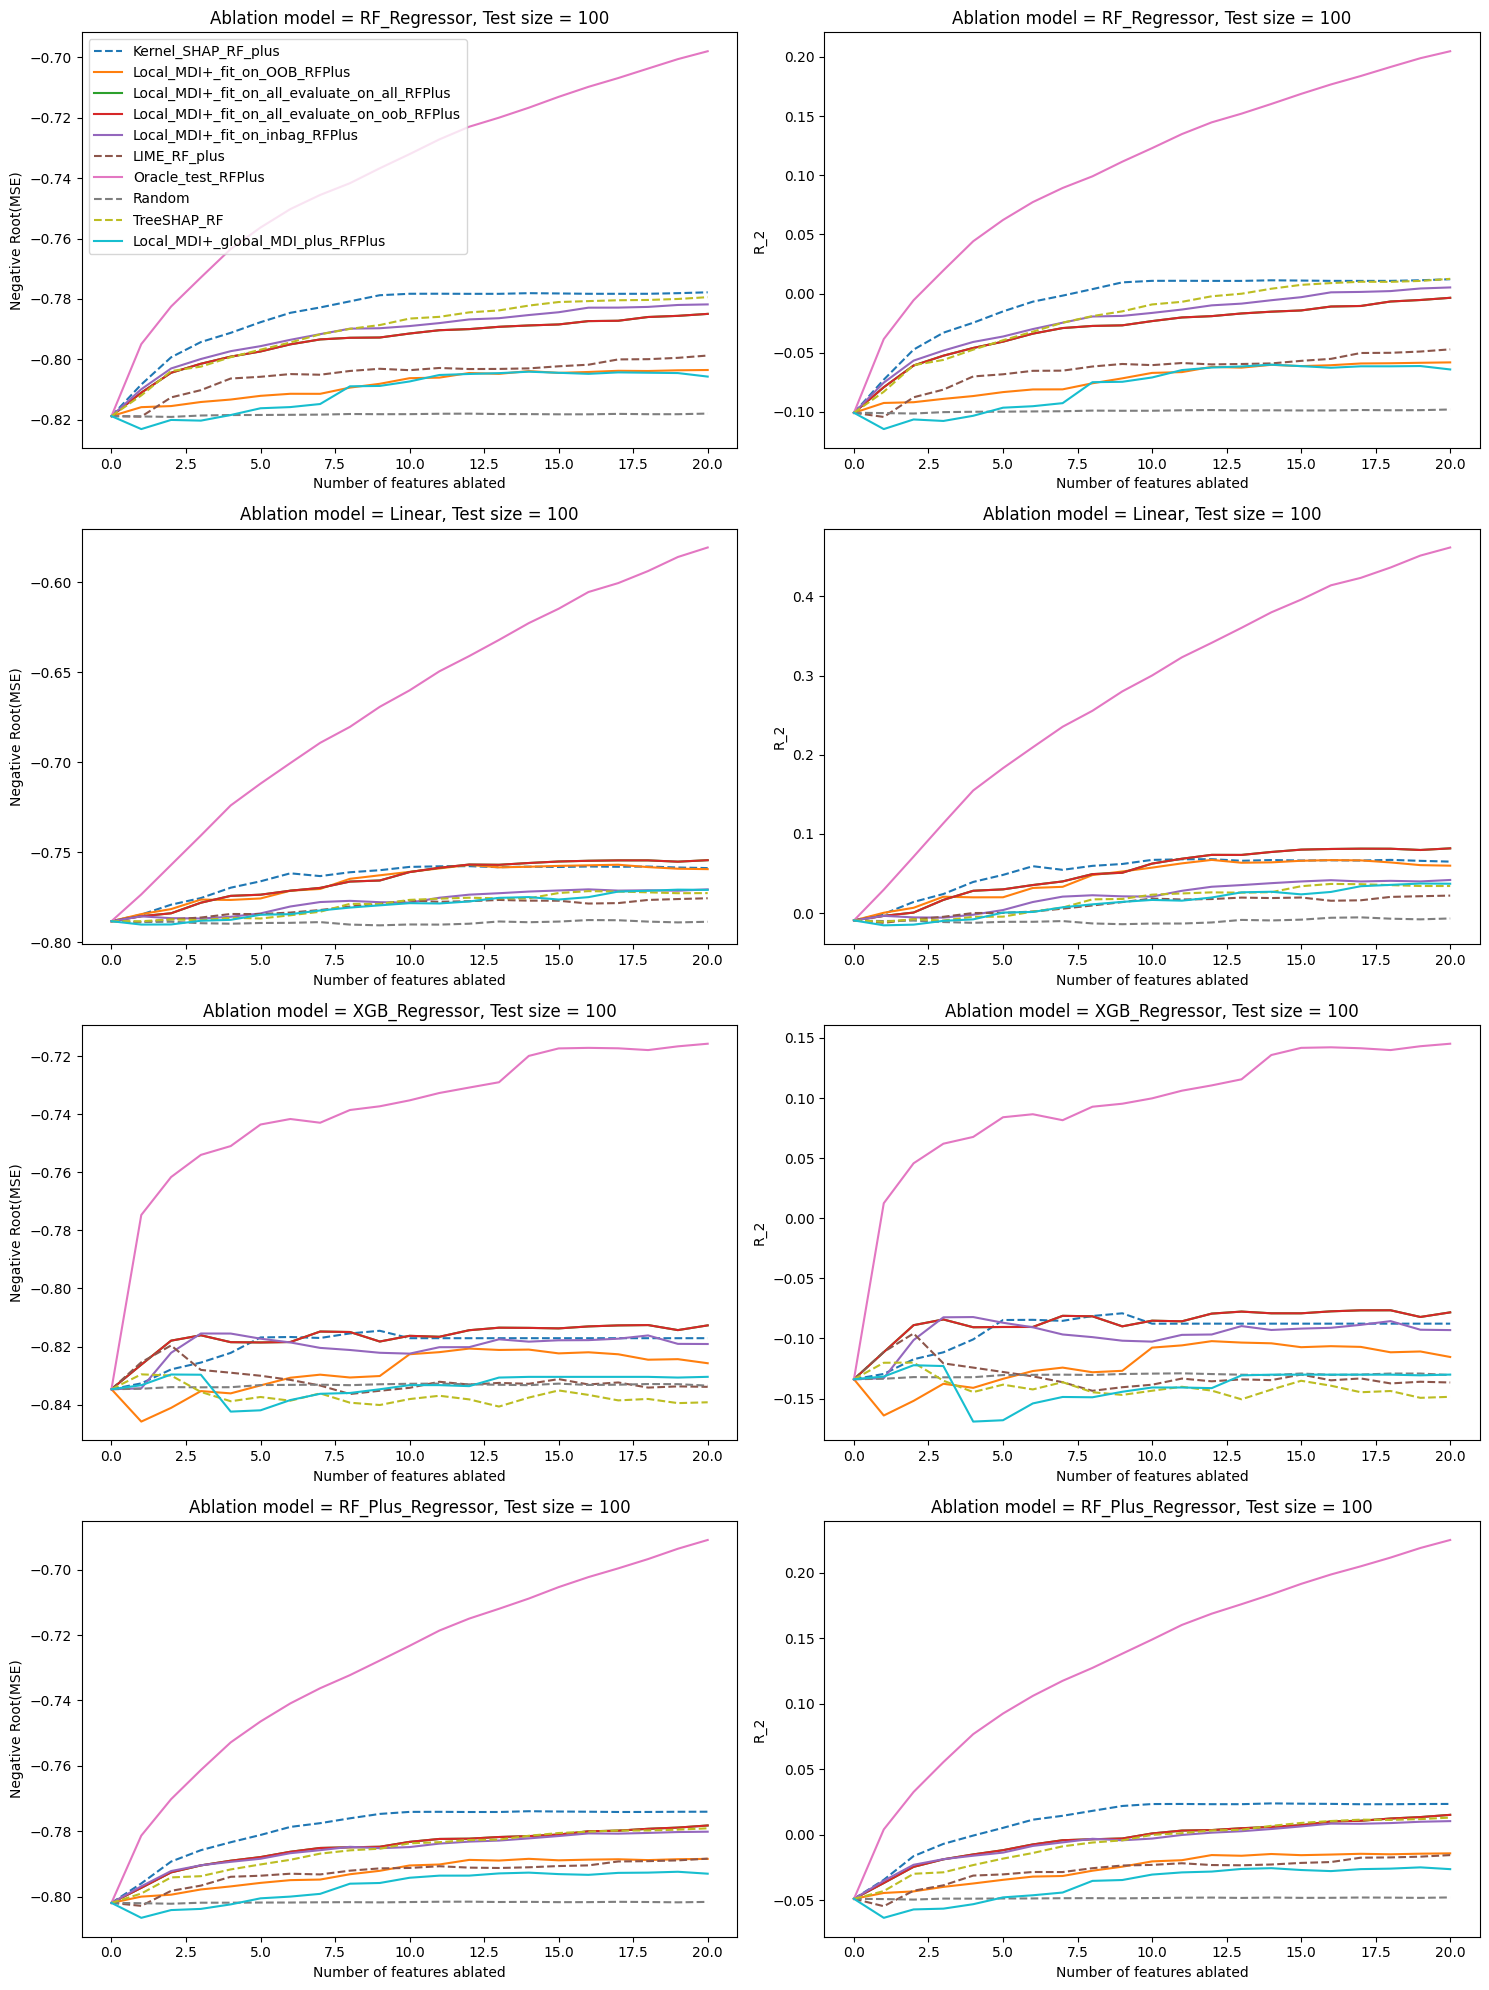

In [15]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test_subset:
            results[m] = []
        for m in methods_test_subset:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_before_ablation_addition"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_subset_"+metric+f"_after_ablation_{k+1}_addition"].mean())
        ax = axs[i, j]
        for m in methods_test_subset:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = 100')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = 100')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_subset_addition.png")
plt.show()

#### Test Data

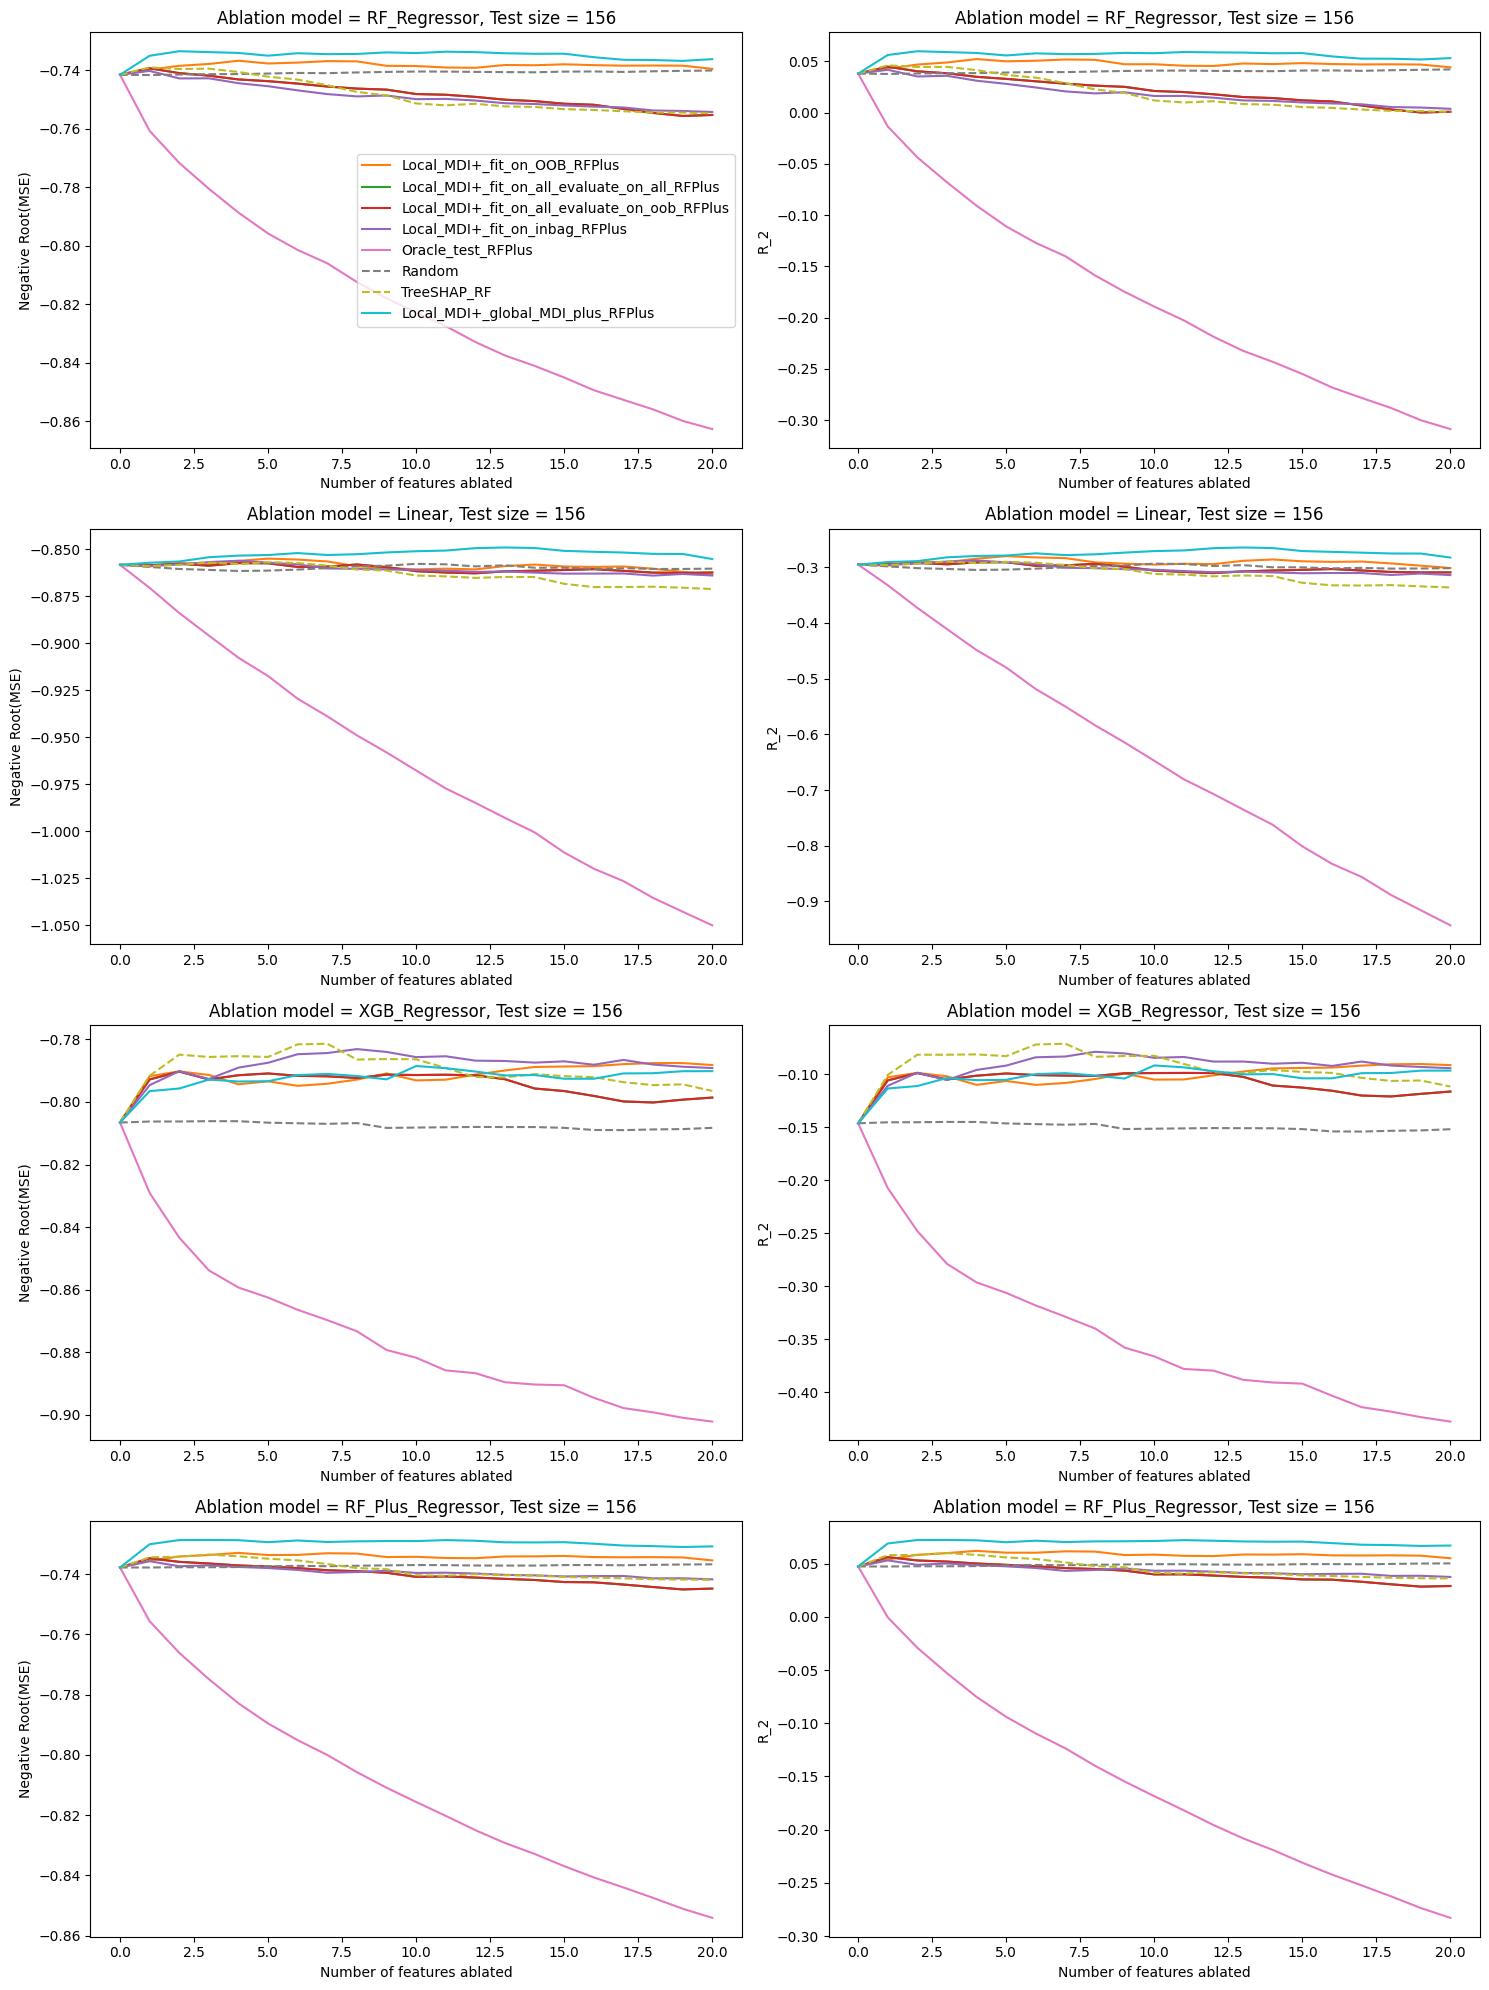

In [16]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_removal.png")
plt.show()

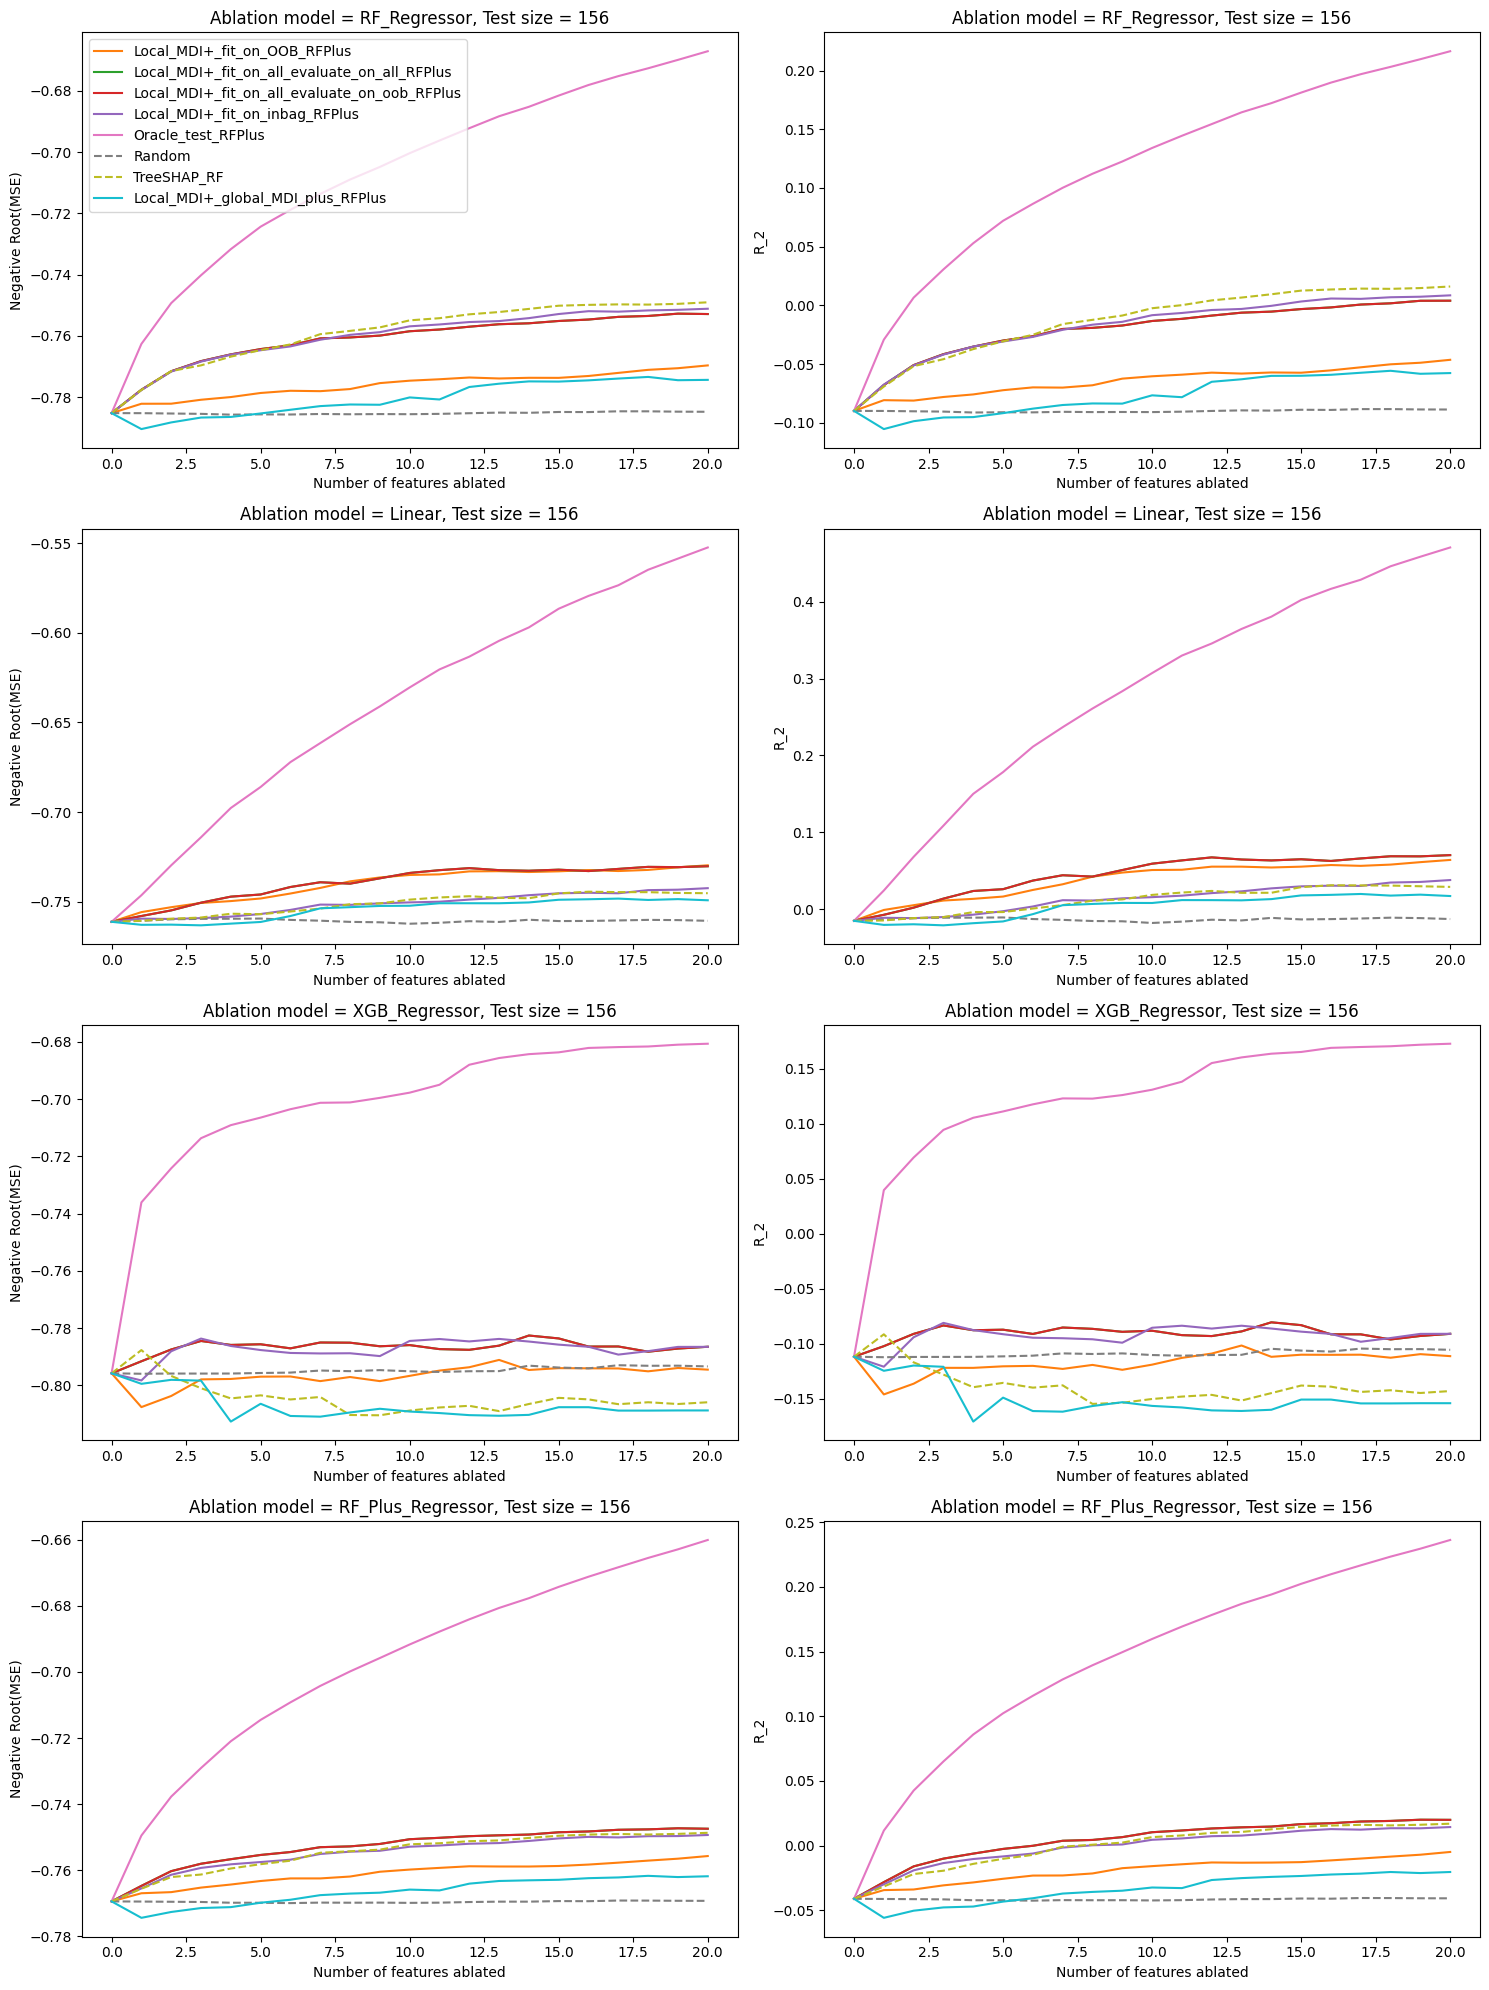

In [17]:
fig, axs = plt.subplots(len(ablation_models[task]), len(metrics[task]), figsize=(15, 20))
for i, a_model in enumerate(ablation_models[task]):
    for j, metric in enumerate(metrics[task]):
        results = {}
        for m in methods_test:
            results[m] = []
        for m in methods_test:
            if metric == "MSE":
                results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean()))
                for k in range(num_features):
                    results[m].append(-1*np.sqrt(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean()))
            else:
                results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_before_ablation_addition"].mean())
                for k in range(num_features):
                    results[m].append(combined_df[combined_df['fi'] == m][a_model+"_test_"+metric+f"_after_ablation_{k+1}_addition"].mean())
        ax = axs[i, j]
        for m in methods_test:
            color = color_map[m]
            if m in ["TreeSHAP_RF", "Kernel_SHAP_RF_plus", "LIME_RF_plus", "Random"]:
                ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed', color=color)
            else:
                ax.plot(range(num_features+1), results[m], label=m, color=color)
        if metric == "MSE":
            ax.set(xlabel='Number of features ablated', ylabel= f"Negative Root({metric})",
                title=f'Ablation model = {a_model}, Test size = {test_size}')
        else:
            ax.set(xlabel='Number of features ablated', ylabel=metric,
                    title=f'Ablation model = {a_model}, Test size = {test_size}')
        if i == 0 and j == 0:
            ax.legend()

plt.tight_layout()
plt.savefig(f"./{task_name}_{task}_test_addition.png")
plt.show()